In [20]:
import numpy as np
import pandas as pd
from os import chdir, listdir
from os.path import isfile, splitext, join
import umap
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from collections import Counter
import random 
import seaborn as sns
import matplotlib.patches as mpatches

wd="/mnt/storage5/anton/Amplicon/Leen/temp/"

In [7]:

MSAmatrices = [f for f in listdir(wd) if isfile(join(wd, f)) and splitext(f)[1]==".npy"]

matrixData={}
for matrix in MSAmatrices:
    matrixData[matrix.replace("mafft","").replace(".npy","")]=pd.read_pickle(wd+matrix)
i=0

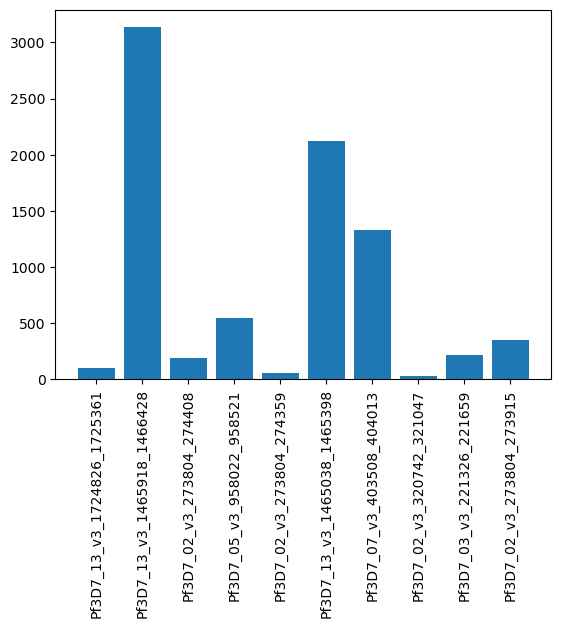

In [8]:
#show regional read densities
readDepths=[]
regions=[]
for region in matrixData.keys():
    readDepths.append(matrixData[region].shape[0])
    regions.append(region)
plt.bar(x=range(0,len(readDepths)), height=readDepths, tick_label=regions)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#This will create clustering plot of reads in each region. Each point is a read
minReadDepth=30
for region in matrixData:
    if matrixData[region].shape[0]<minReadDepth:
        continue
    data=matrixData[region].drop("Sample",axis=1)
    X_embedded = umap.UMAP(n_neighbors=int(data.shape[0]*0.1), min_dist=0.1, metric='hamming').fit_transform(data)
    clustering = DBSCAN(eps=1, min_samples=5).fit(X_embedded).labels_
    print(Counter(clustering))
    
    plt.scatter(X_embedded[:,0],X_embedded[:,1], s=2, c=clustering)
    plt.title(region)
    plt.show()


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({0: 98})


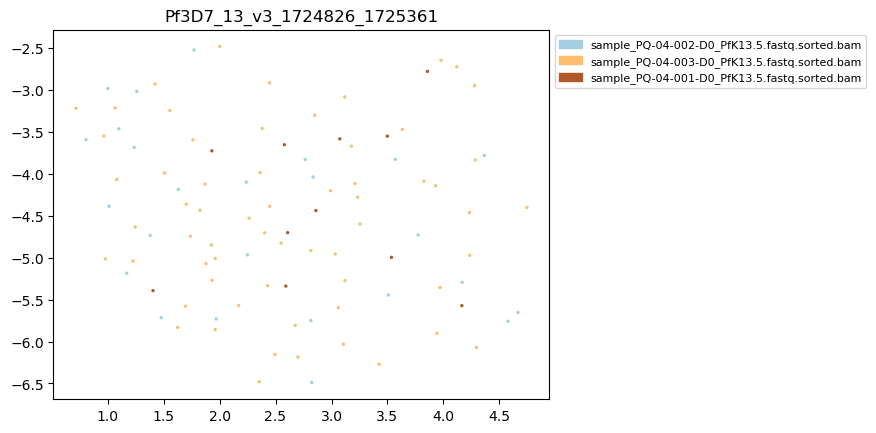

/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


In [48]:
#This will create clustering plot of reads in each region and will colour points by sample the reads are from. Each point is a read
minReadDepth=30
for region in matrixData:
    if matrixData[region].shape[0]<minReadDepth:
        continue
    data=matrixData[region].drop("Sample",axis=1)

    samples=[f[0] for f in matrixData[region]["Sample"].values]
    regionColoursDic={}
    regionsCmap=plt.cm.get_cmap('Paired', len(set(samples)))
    for sample in set(samples):
        regionColoursDic[sample]=regionsCmap( len(regionColoursDic) / len(set(samples)) )

    X_embedded = umap.UMAP(n_neighbors=int(data.shape[0]*0.1), min_dist=0.1, metric='hamming').fit_transform(data)
    clustering = DBSCAN(eps=1, min_samples=5).fit(X_embedded).labels_
    print(Counter(clustering))
    
    plt.scatter(X_embedded[:,0],X_embedded[:,1], s=2, c=[  regionColoursDic[f] for f in samples])
    plt.title(region)
    legendElements=[]
    for key in regionColoursDic:
        legendElements.append(mpatches.Patch(color=regionColoursDic[key], label=key))
    plt.legend(bbox_to_anchor=(1,1), handles=legendElements,prop={'size': 8}, loc="upper left")
    plt.show()


In [54]:
#umapResults=pd.read_csv(wd+"Leen_PF_frequencies.tsv", sep="\t")
#umapResults.columns=["Region","Sample","Freq"]
for sample in np.unique(umapResults["Region"]):
    sns.violinplot(y="Freq", x="Sample", data=umapResults.loc[umapResults["Region"]==sample])
#sns.violinplot(y="Freq", x="Region", data=umapResults)
    #plt.figure()
    #plt.violinplot(], points=200)
    #plt.show()
    #break
    # plt.gca().set_ylim([0,4])
    # fig = plt.gcf()
    # fig.set_size_inches(5, 2)
    plt.title(sample)
    plt.savefig(wd+"/clusteringPlots/"+sample+".jpg")
    plt.close()
